In [23]:
import torch
import moco.builder as builder
import moco.loader as loader
import torchvision.models as models
from PIL import Image
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
device =  torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

In [7]:
model = builder.MoCo(
    base_encoder=models.resnet50
)
model = model.to(device)
model.eval()
print("Model loaded successfully.")

Model loaded successfully.


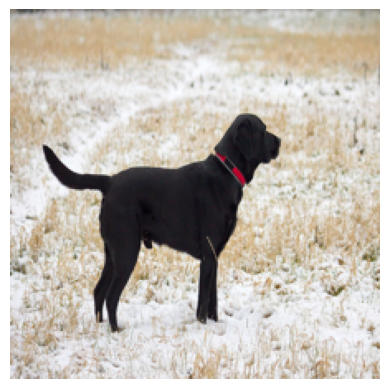

In [38]:
img_path = '/export/home/darpan/work_dir/cvProject/src/images/dog.jpg'
# load image


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

img = Image.open(img_path)
# cropt the image to 224x224
img = img.resize((224, 224))

# plot the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
augmentation = [
    transforms.RandomResizedCrop(224, scale=(0.2, 1.0)),
    transforms.RandomGrayscale(p=0.2),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]

In [25]:
loadImg = loader.TwoCropsTransform(
    transforms.Compose(augmentation)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.1062311].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.367669].


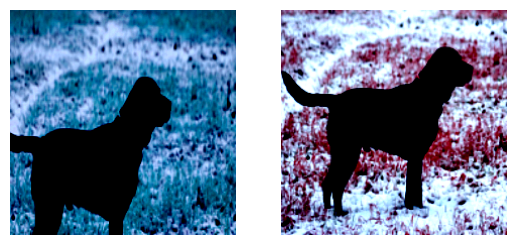

In [67]:
x, y = loadImg(img)

# plot the augmented images
plt.subplot(1, 2, 1)
plt.imshow(x.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(y.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()


In [44]:
x = x.unsqueeze(0).to(device)
y = y.unsqueeze(0).to(device)

# get the features
output, target = model(x, y)

ValueError: Default process group has not been initialized, please make sure to call init_process_group.